In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("cardekho_dataset.csv")
data.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [6]:
data.rename(columns={"engine":"engine_power","max_power":"Max_Power"},inplace=True)

In [7]:
data.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine_power,Max_Power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [8]:
numerical=[features for features in data.columns if data[features].dtype!="O"]
categorical=[features for features in data.columns if data[features].dtype=="O"]
numerical,categorical

(['Unnamed: 0',
  'vehicle_age',
  'km_driven',
  'mileage',
  'engine_power',
  'Max_Power',
  'seats',
  'selling_price'],
 ['car_name',
  'brand',
  'model',
  'seller_type',
  'fuel_type',
  'transmission_type'])

## Univariate Analysis

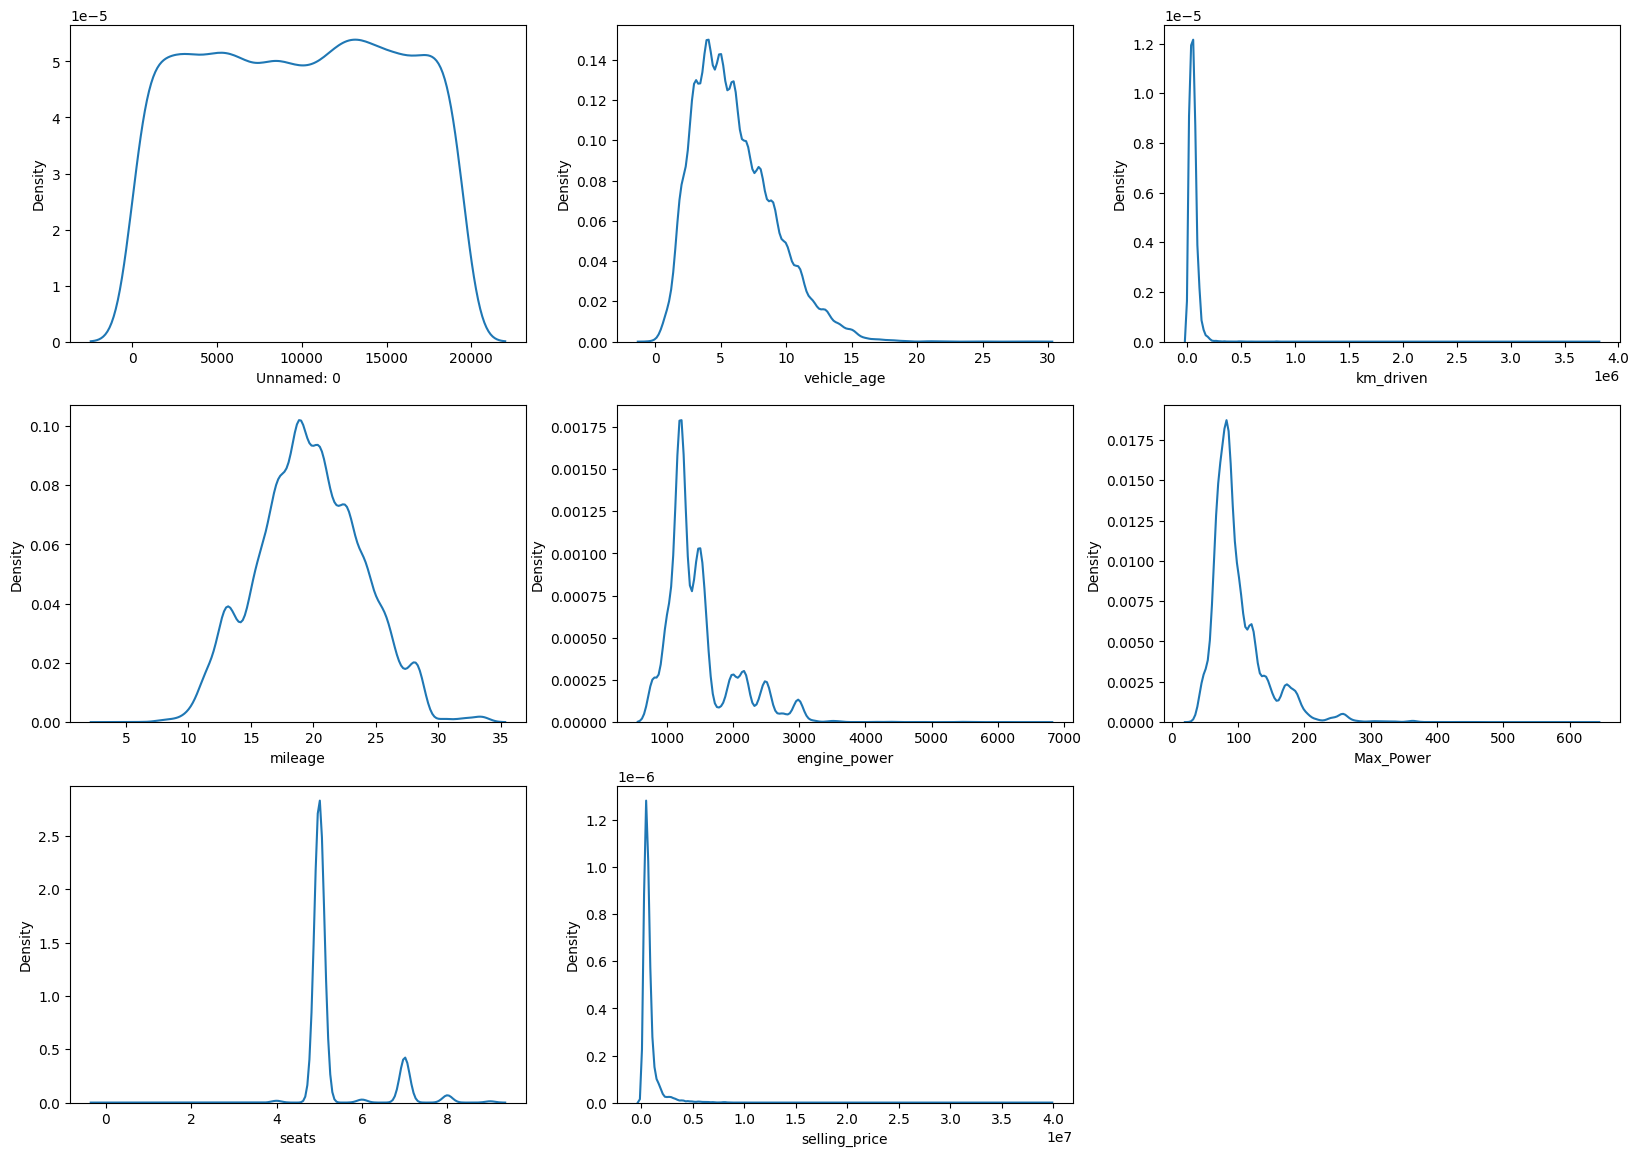

In [9]:
plt.figure(figsize=(20,14))
for i in range(len(numerical)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data[numerical[i]])
    i=i+1

In [10]:
k=0
for i in data.columns:
    print(data[i].value_counts())
    k=k+1

Unnamed: 0
0        1
13208    1
13103    1
13105    1
13106    1
        ..
6527     1
6528     1
6529     1
6530     1
19543    1
Name: count, Length: 15411, dtype: int64
car_name
Hyundai i20           906
Maruti Swift Dzire    890
Maruti Swift          781
Maruti Alto           778
Honda City            757
                     ... 
Mercedes-AMG C          1
Tata Altroz             1
Ferrari GTC4Lusso       1
Hyundai Aura            1
Force Gurkha            1
Name: count, Length: 121, dtype: int64
brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nis

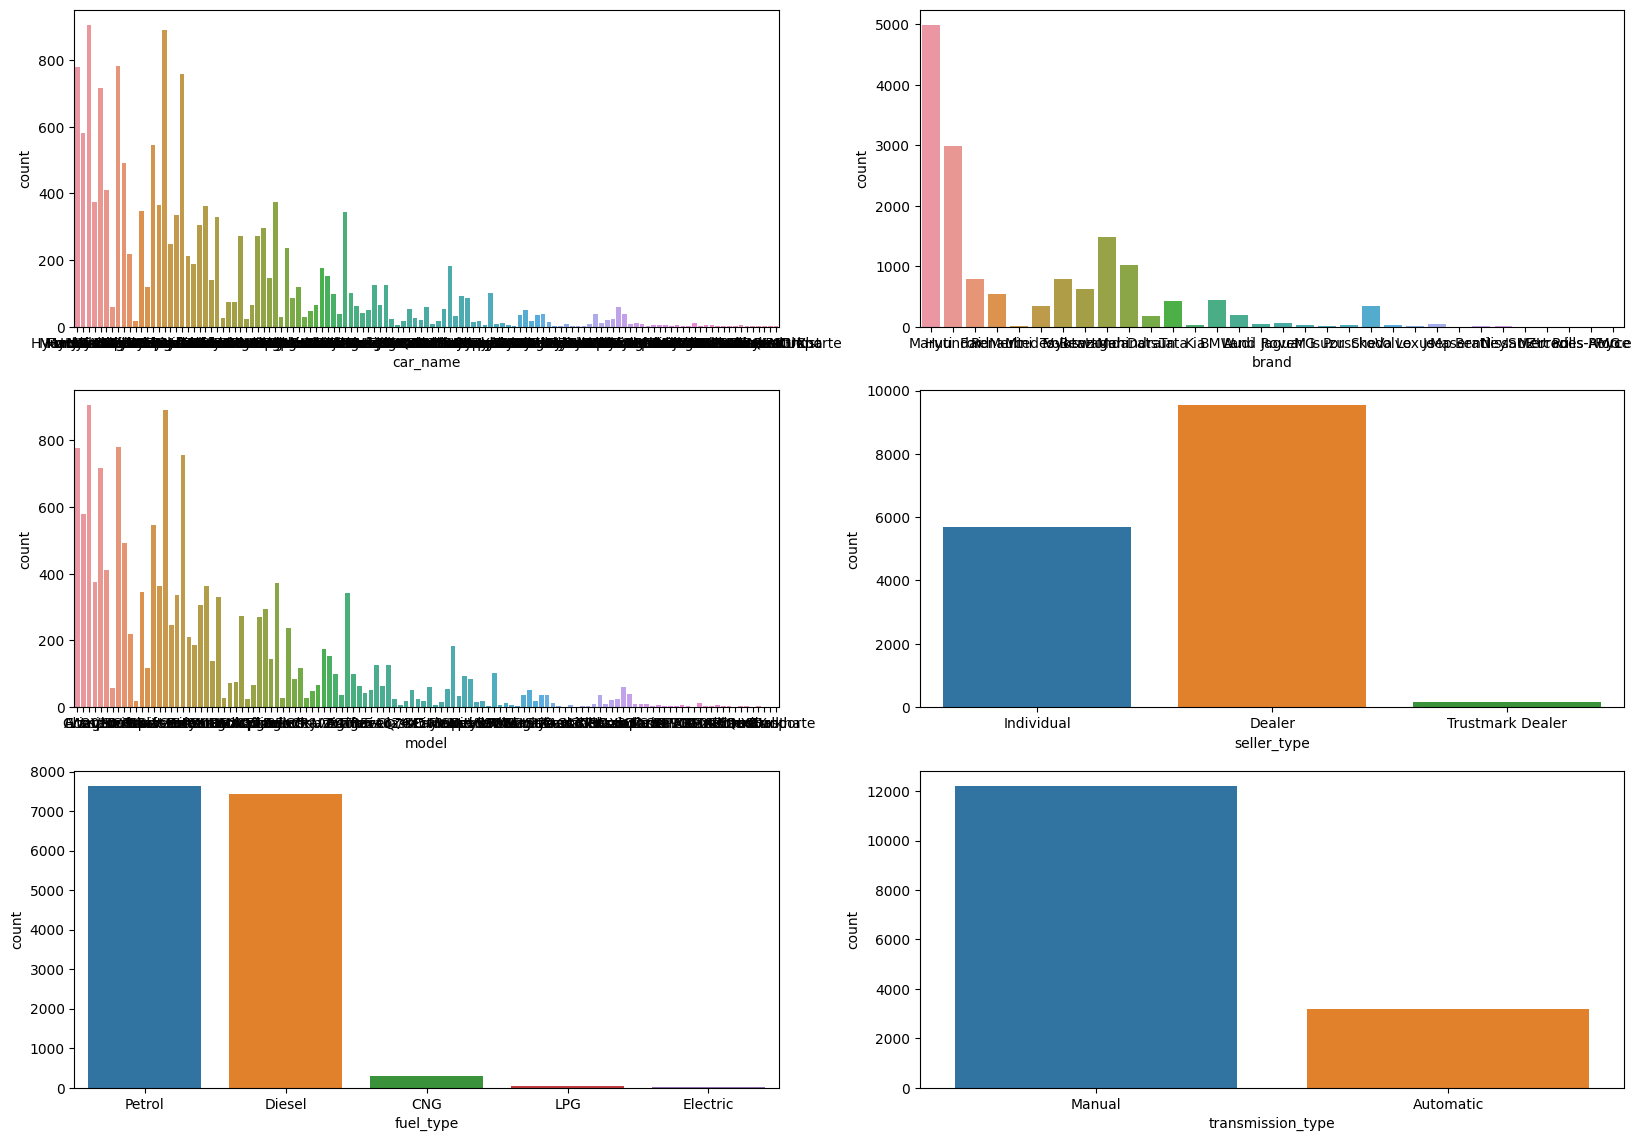

In [11]:
plt.figure(figsize=(20,14))
for i in range(len(categorical)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[categorical[i]])
    i=i+1

## Multivariate Analysis

<Axes: >

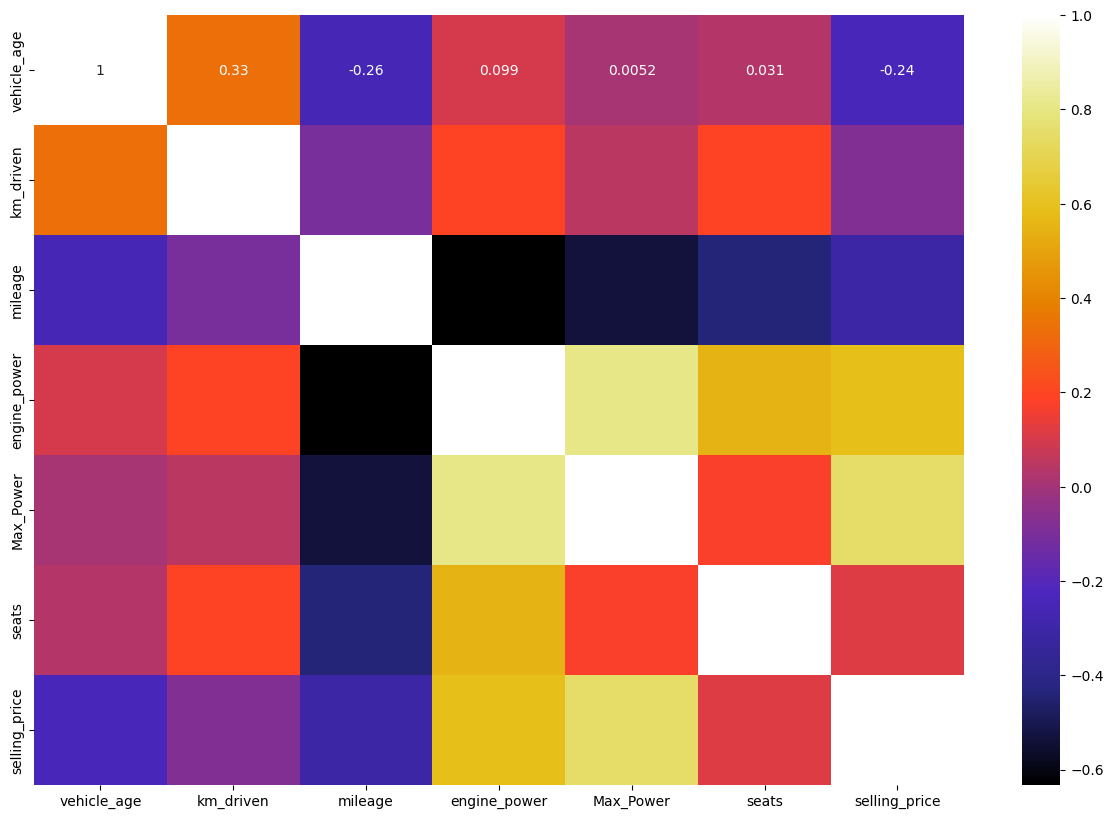

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data[numerical].iloc[:,1:].corr(),annot=True,cmap="CMRmap")

In [13]:
data[numerical].corr()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine_power,Max_Power,seats,selling_price
Unnamed: 0,1.000000,-0.006250,-0.003778,-0.014699,0.012972,0.039367,-0.031832,0.030523
vehicle_age,-0.006250,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,-0.003778,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.014699,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine_power,0.012972,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
Max_Power,0.039367,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,-0.031832,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,0.030523,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


In [14]:
from scipy.stats import chi2_contingency
for i in range(len(categorical)):
    if chi2_contingency(pd.crosstab(data[categorical[i]],data.selling_price))[1] <0.05:
        print(f"For {categorical[i]} Reject Null Hypothesis: Feature and Target are dependent (associated).")
    else:
        print(f"For {categorical[i]} Fail to Reject Null Hypothesis: No significant association.")

For car_name Reject Null Hypothesis: Feature and Target are dependent (associated).
For brand Reject Null Hypothesis: Feature and Target are dependent (associated).
For model Reject Null Hypothesis: Feature and Target are dependent (associated).
For seller_type Reject Null Hypothesis: Feature and Target are dependent (associated).
For fuel_type Reject Null Hypothesis: Feature and Target are dependent (associated).
For transmission_type Reject Null Hypothesis: Feature and Target are dependent (associated).


In [15]:
len(numerical[1:])

7

## Bivariate Analysis

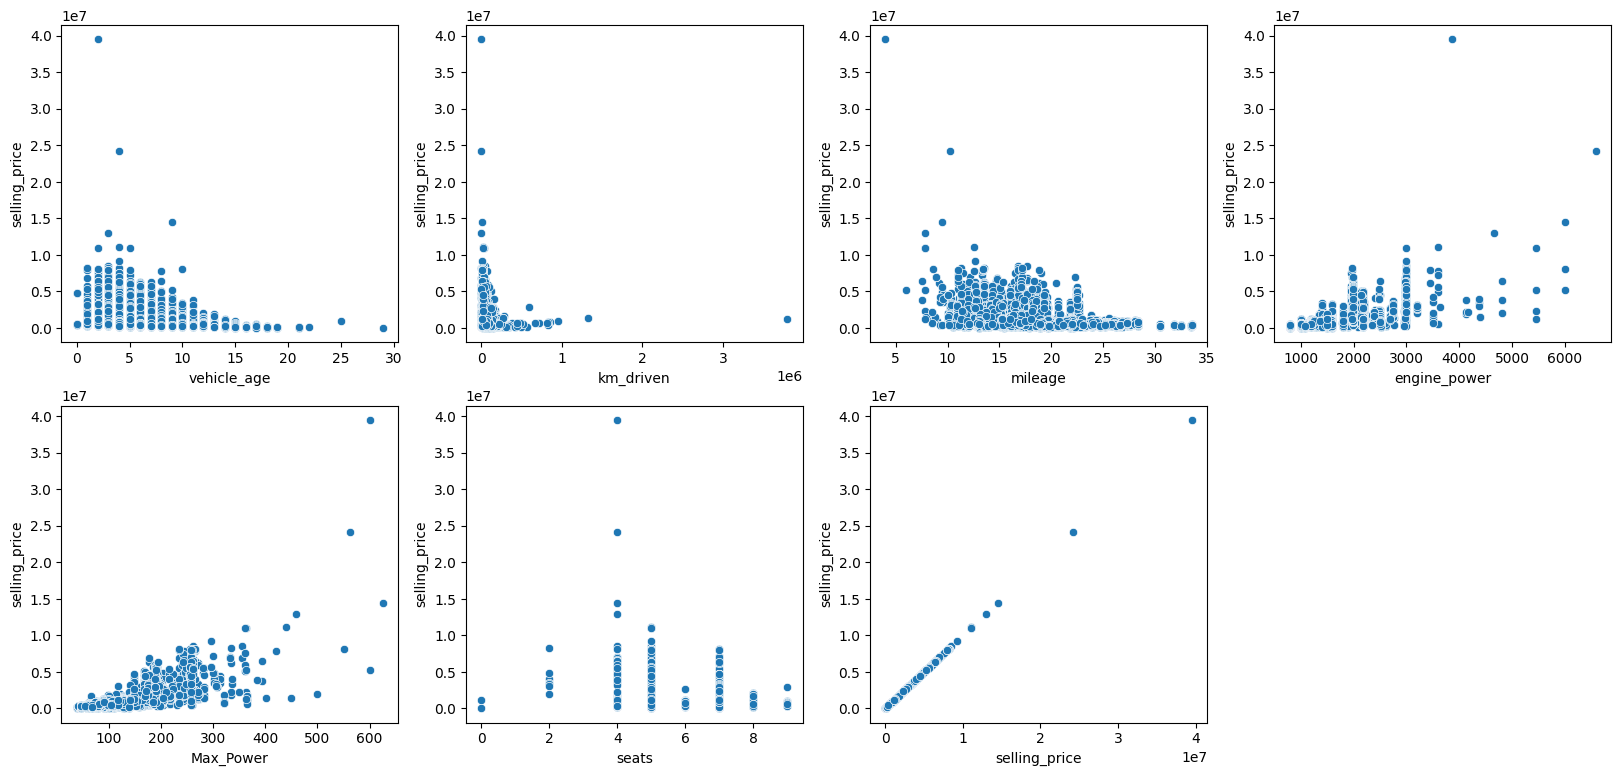

In [16]:
plt.figure(figsize=(20,14))
for i in range(len(numerical[1:])):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=data[numerical[1:][i]],y=data.selling_price)
    i=i+1

## Target Feature Analysis

Text(0.5, 0, 'Selling price in millions')

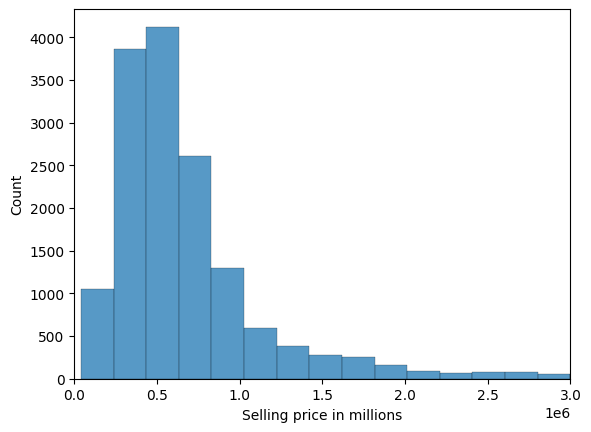

In [17]:
sns.histplot(data.selling_price,bins=200)
plt.xlim(0,3000000)
plt.xlabel("Selling price in millions")

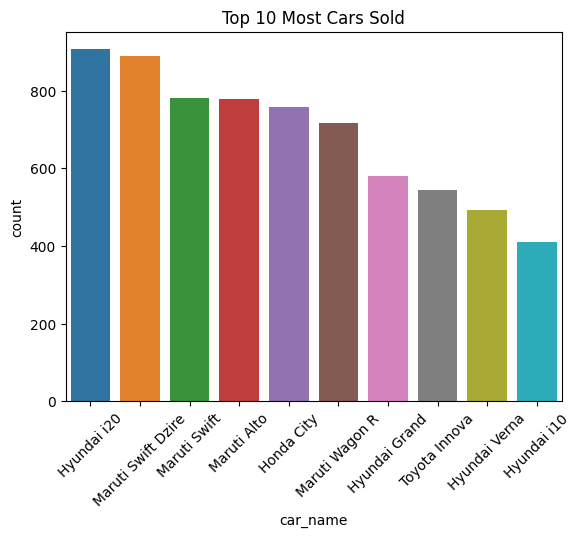

Index(['Hyundai i20', 'Maruti Swift Dzire', 'Maruti Swift', 'Maruti Alto',
       'Honda City', 'Maruti Wagon R', 'Hyundai Grand', 'Toyota Innova',
       'Hyundai Verna', 'Hyundai i10'],
      dtype='object', name='car_name')

In [18]:
top10car=data.car_name.value_counts()[:10].index
sns.countplot(x="car_name",data=data[data.car_name.isin(top10car)],order=top10car)
plt.xticks(rotation=45)
plt.title("Top 10 Most Cars Sold")
plt.show()
top10car

#### Reports
- According to the analysis these are the top  10 selling cars in the used car website
- Of the total selling care hyundai i20 shares 5.8%.
- Mean price of the hyundai i20 car is 5.4 lakhs

In [19]:
data[data.car_name=="Hyundai i20"]["selling_price"].mean()

543603.7527593819

In [20]:
data.brand.value_counts()[:7]

brand
Maruti        4992
Hyundai       2982
Honda         1485
Mahindra      1011
Toyota         793
Ford           790
Volkswagen     620
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

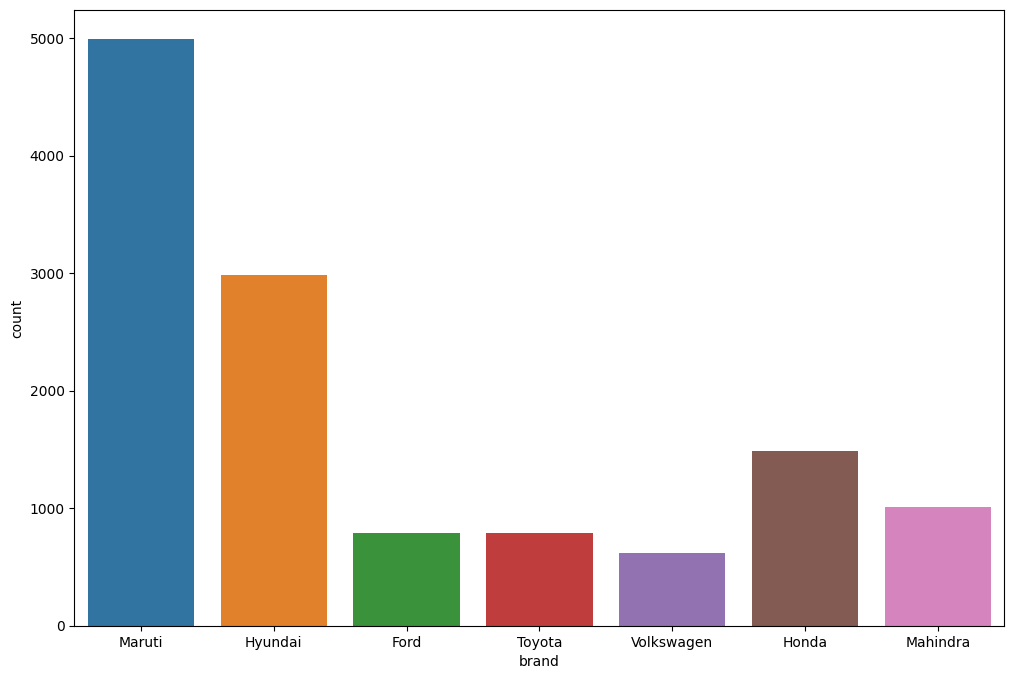

In [21]:
top7brand=data.brand.value_counts().sort_values(ascending=False)[:7].index
plt.figure(figsize=(12,8))
sns.countplot(x="brand",data=data[data.brand.isin(top7brand)])

### Report 
- these are the top 7 brands of used cars sold on the website.
- maruti is the highest used car sold.

In [22]:
brand=data.groupby("brand")["selling_price"].max()
df=pd.DataFrame(brand)
max=df.selling_price.sort_values(ascending=False)
max[:10]

brand
Ferrari          39500000
Rolls-Royce      24200000
Bentley          14500000
Mercedes-Benz    13000000
Porsche          11100000
Land Rover        9200000
BMW               8500000
Volvo             8195000
Lexus             8000000
Audi              6800000
Name: selling_price, dtype: int64

##### These are top 10 most costliest car brand

In [23]:
type(brand)

pandas.core.series.Series

In [24]:
data.brand.unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

<Axes: xlabel='brand'>

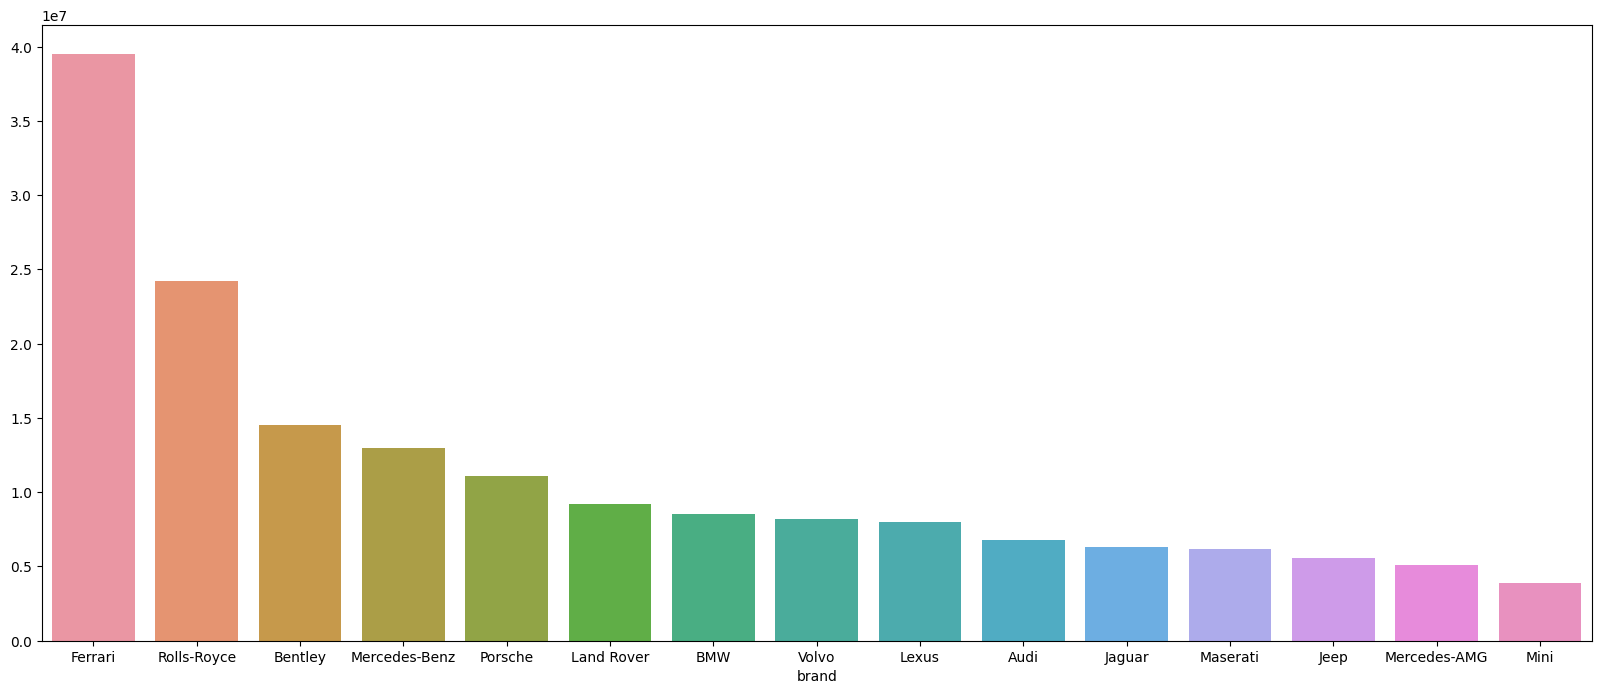

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(x=max[:15].index,y=max[:15].values)

#### Report
- Ferrari is the moat costliest car sold at 3.95 cr.
- Rolls royce is the second most costliest car sold at 2.42cr.
- Brand name have cleanr impact on the selling price.

Text(0, 0.5, 'Mileage')

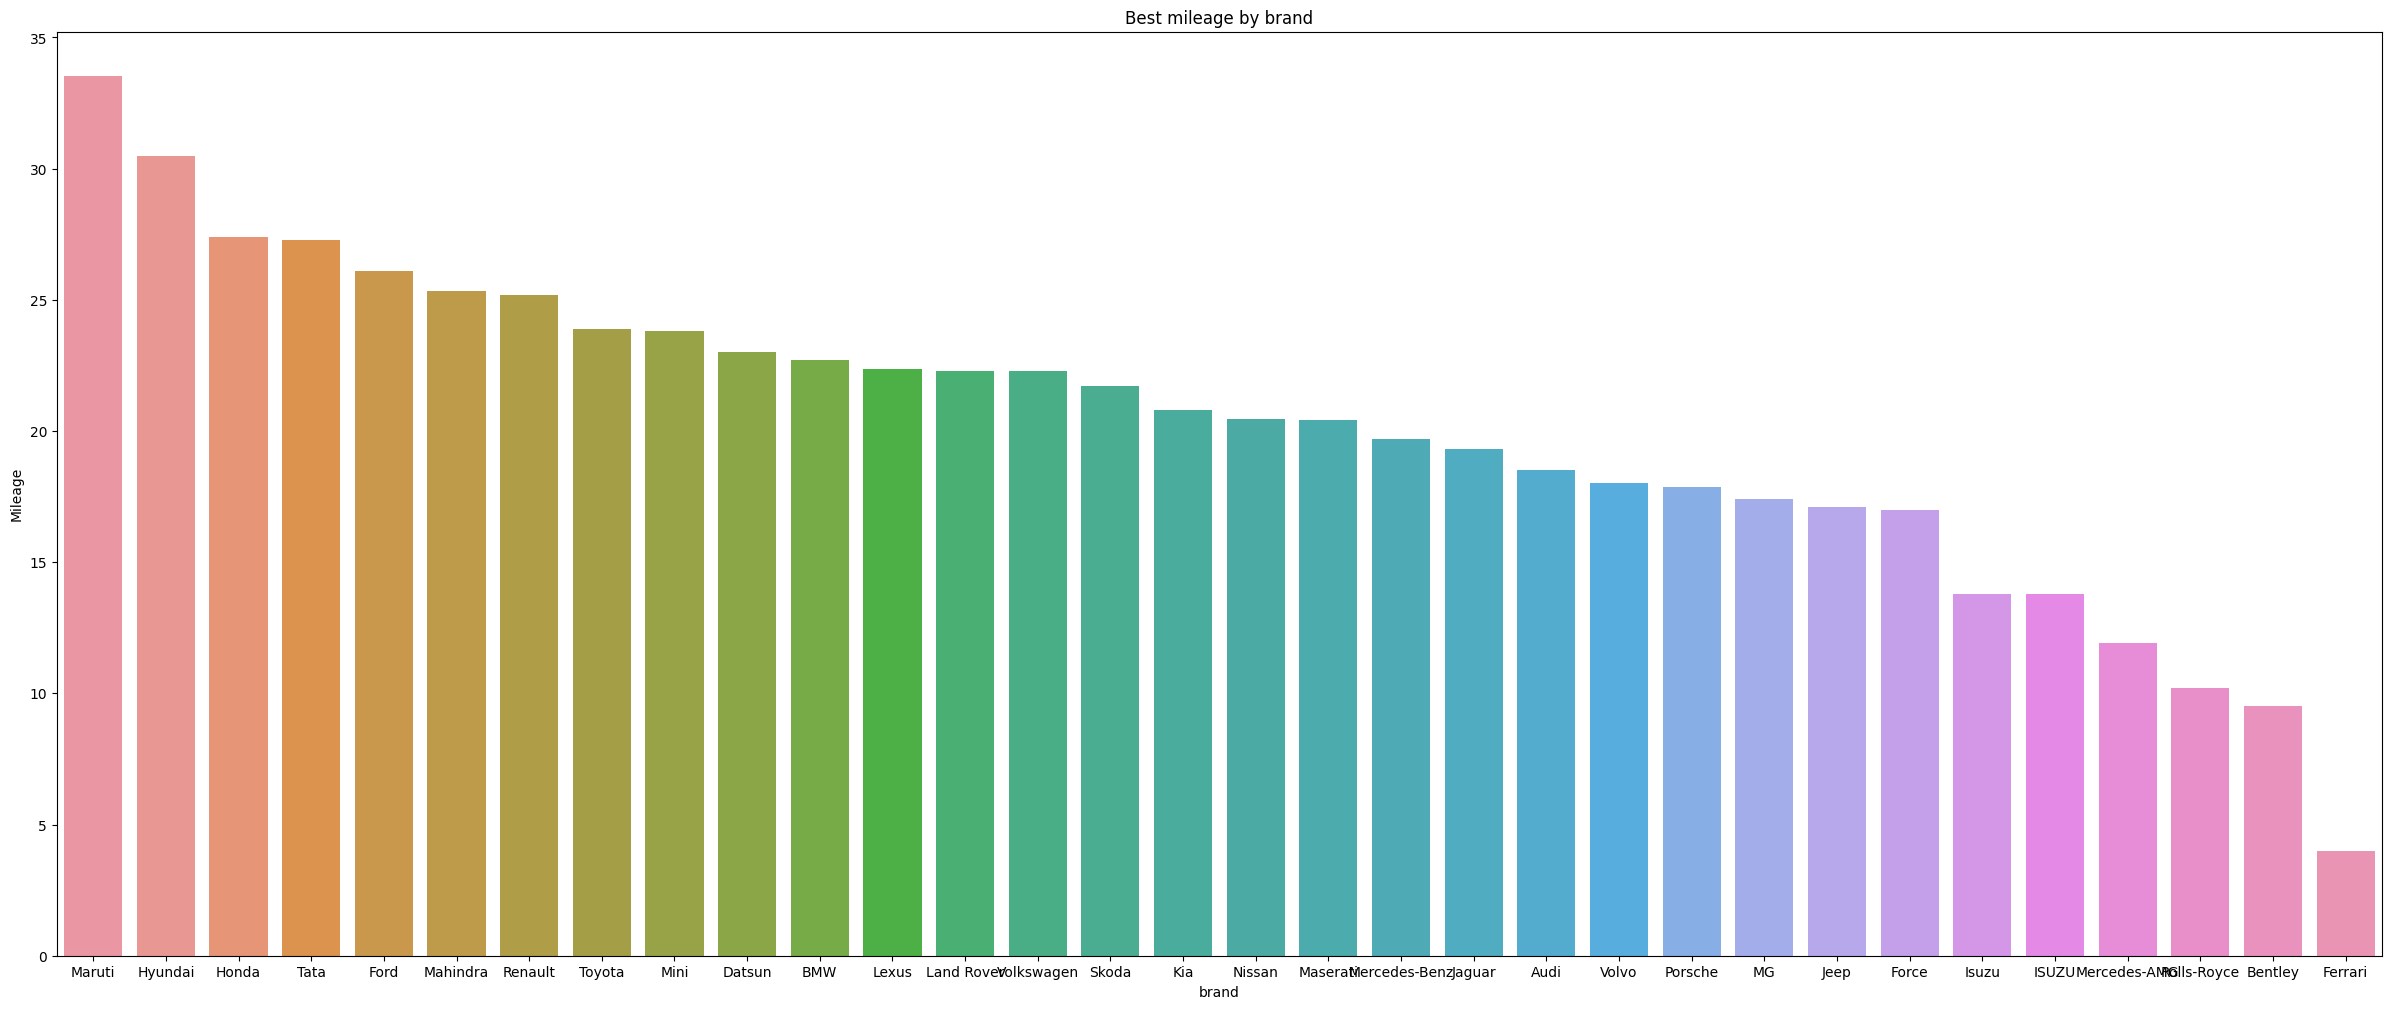

In [26]:
best10mileage=data.groupby("brand")["mileage"].max()
best10mileage.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(30,12))
sns.barplot(x=best10mileage.index,y=best10mileage.values)
plt.title("Best mileage by brand")
plt.ylabel("Mileage")

Text(0, 0.5, 'Mileage')

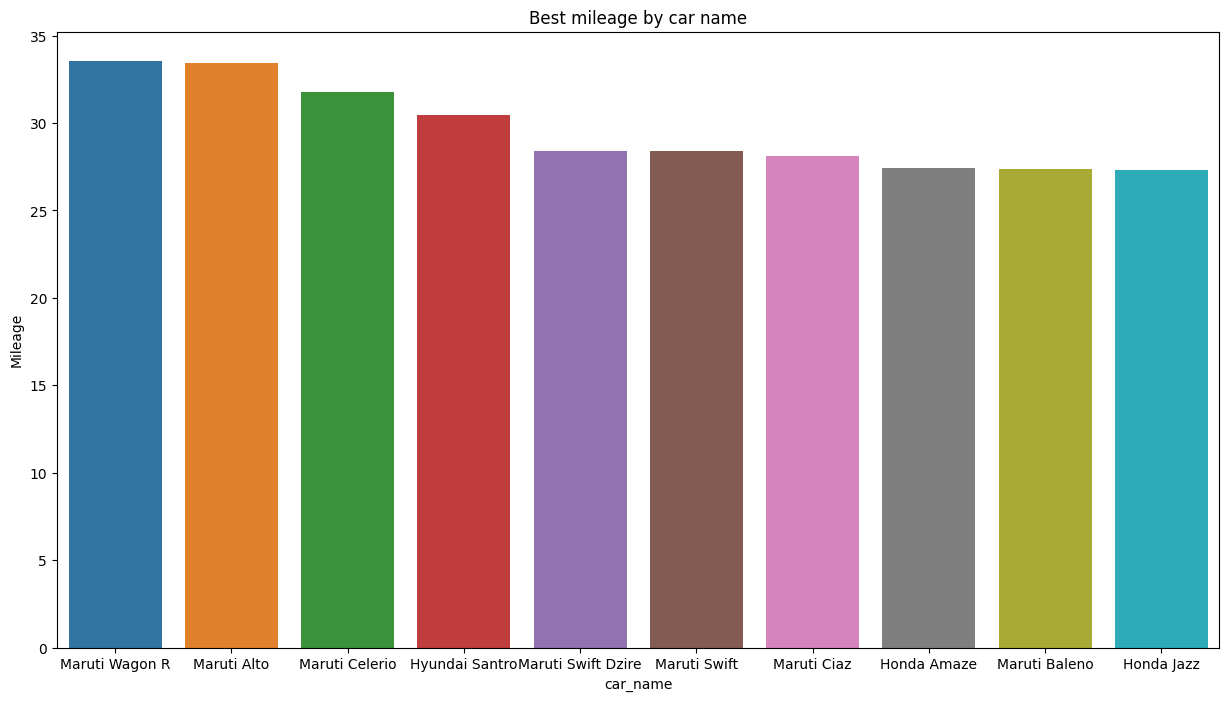

In [27]:
best10car=data.groupby("car_name")["mileage"].max()
best10car.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(15,8))
sns.barplot(x=best10car[:10].index,y=best10car[:10].values)
plt.title("Best mileage by car name")
plt.ylabel("Mileage")

#### Report
- Maruti has the highest mileage, followed by hyundai and honda.
- The most costliest brands have the least mileage.

Text(0, 0.5, 'Mileage')

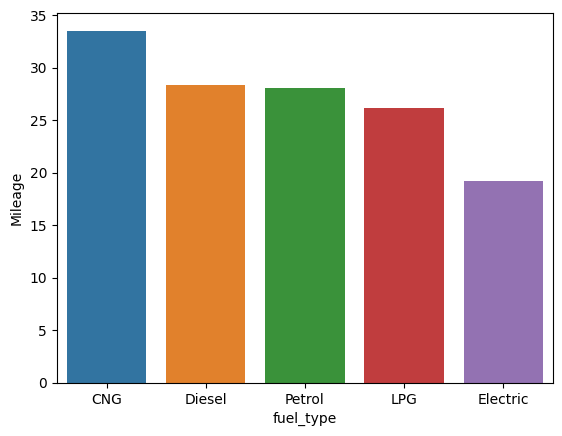

In [28]:
fuelbymileage=data.groupby("fuel_type")["mileage"].max()
sns.barplot(x=fuelbymileage.sort_values(ascending=False).index,y=fuelbymileage.sort_values(ascending=False).values)
plt.ylabel("Mileage")

#### Report
- CNG cars gives the best mileage 
- Electric cars though they are pollution free cars but gives the least mileage

In [29]:
#mdeian is not sensitive to outlier
electric=data.groupby("fuel_type")["selling_price"].median().sort_values(ascending=True)
electric

fuel_type
LPG          182500.0
CNG          370000.0
Petrol       460000.0
Diesel       700000.0
Electric    1857500.0
Name: selling_price, dtype: float64

<Axes: xlabel='fuel_type', ylabel='selling_price'>

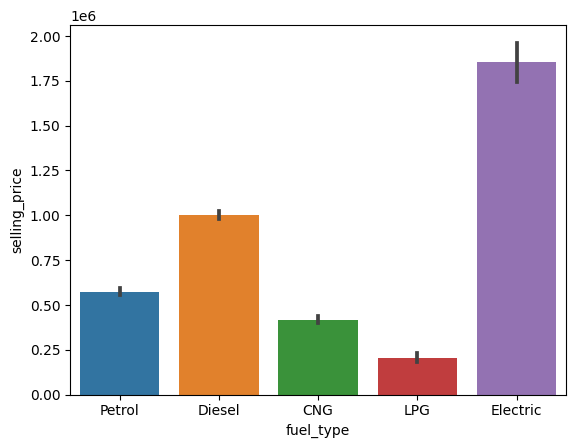

In [30]:
sns.barplot(x=data.fuel_type,y=data.selling_price)

In [31]:
data.groupby("brand")[["selling_price","km_driven"]].max().sort_values(ascending=False,by="km_driven").head(10)

,selling_price,km_driven
brand,,
Mahindra,2950000,3800000
Mercedes-Benz,13000000,1325000
Toyota,3650000,950000
Renault,1155000,850000
Volkswagen,1250000,830000
Hyundai,2600000,825000
Ford,3200000,720000
Skoda,3550000,675000
Honda,3200000,525000


In [32]:
pd.crosstab(data.transmission_type,data.fuel_type,margins=True)

fuel_type,CNG,Diesel,Electric,LPG,Petrol,All
transmission_type,,,,,,
Automatic,0,1634,4,0,1548,3186
Manual,301,5785,0,44,6095,12225
All,301,7419,4,44,7643,15411


<Axes: xlabel='fuel_type', ylabel='count'>

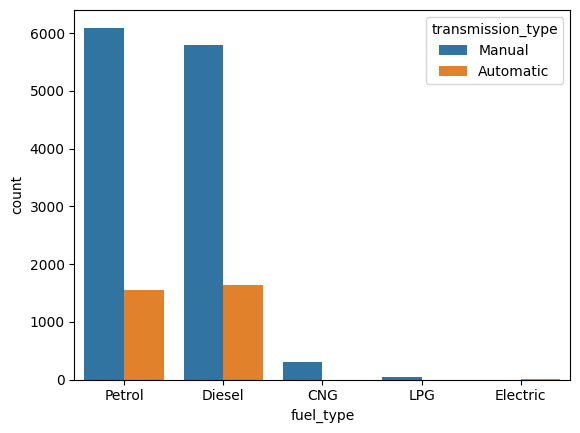

In [33]:
sns.countplot(x=data.fuel_type,hue=data.transmission_type)

(0.0, 400000.0)

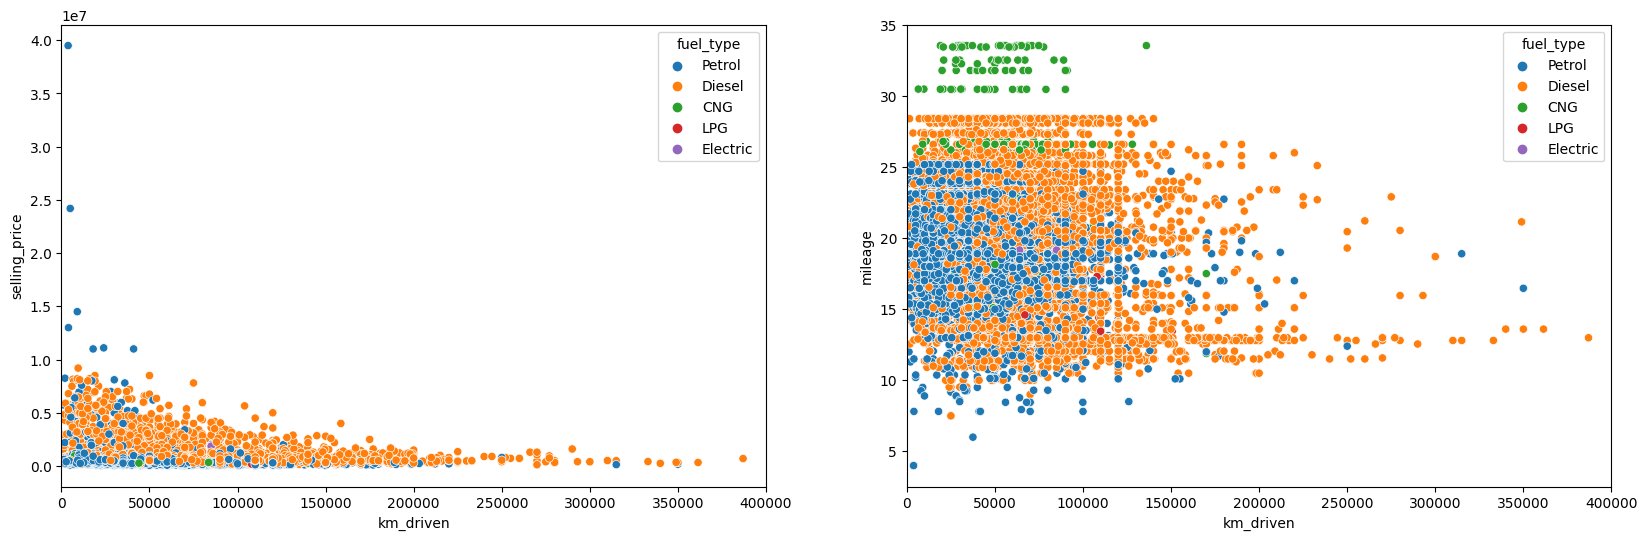

In [34]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(x=data.km_driven,y=data.selling_price,hue=data.fuel_type)
plt.xlim(0,400000)
plt.subplot(1,2,2)
sns.scatterplot(x=data.km_driven,y=data.mileage,hue=data.fuel_type)
plt.xlim(0,400000)

### Report
- Most of the used cars sold lies in km ranging from  **0-2,00,000**.
- As the km_driven increases the selling_price decreases.
- As km_driven increases the mileage decreases to some extent.

In [35]:
for i in  numerical:
    print(f"{i} Skewness :{data[i].skew()}")

Unnamed: 0 Skewness :-0.01455376227135576
vehicle_age Skewness :0.8337120214365826
km_driven Skewness :28.172710872110212
mileage Skewness :0.10496103450949668
engine_power Skewness :1.666466626105951
Max_Power Skewness :2.485129431649049
seats Skewness :2.0399825131714278
selling_price Skewness :10.047047978435213


In [36]:
# fig,axs=plt.subplots(3,3,figsize=(20,20))
# k=0
# for i in range(3):
#     for j in range(3):
#         axs[i][j].boxplot(data[numerical[k]])
#         axs[i][j].set_xlabel(numerical[k])
#         k=k+1

<Axes: xlabel='fuel_type', ylabel='mileage'>

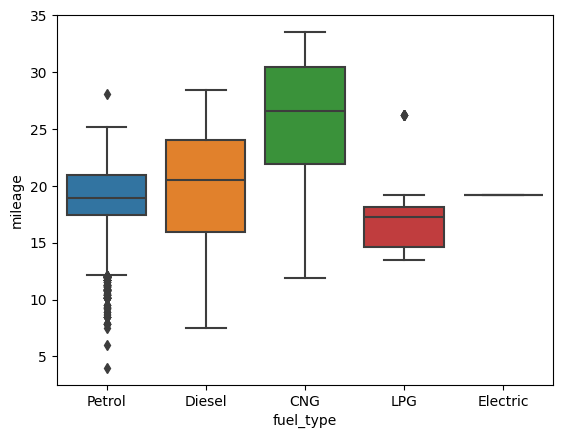

In [37]:
sns.boxplot(x=data.fuel_type,y=data.mileage)

<Axes: xlabel='mileage', ylabel='Count'>

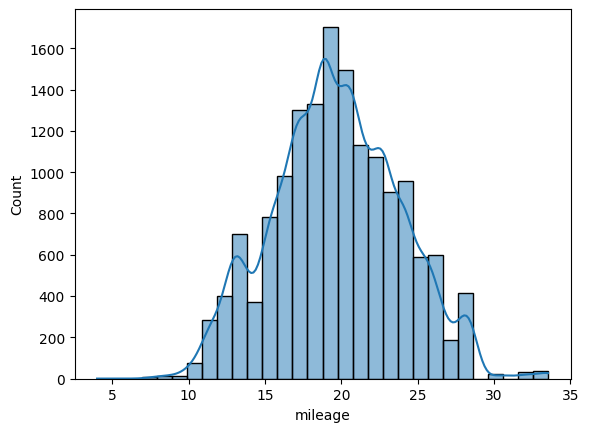

In [38]:
sns.histplot(data.mileage,bins=30,kde=True)

In [39]:
data.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine_power         0
Max_Power            0
seats                0
selling_price        0
dtype: int64

In [40]:
data.duplicated().sum()

0

In [41]:
data[data.brand=="Ferrari"]

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats,selling_price
3799,4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000


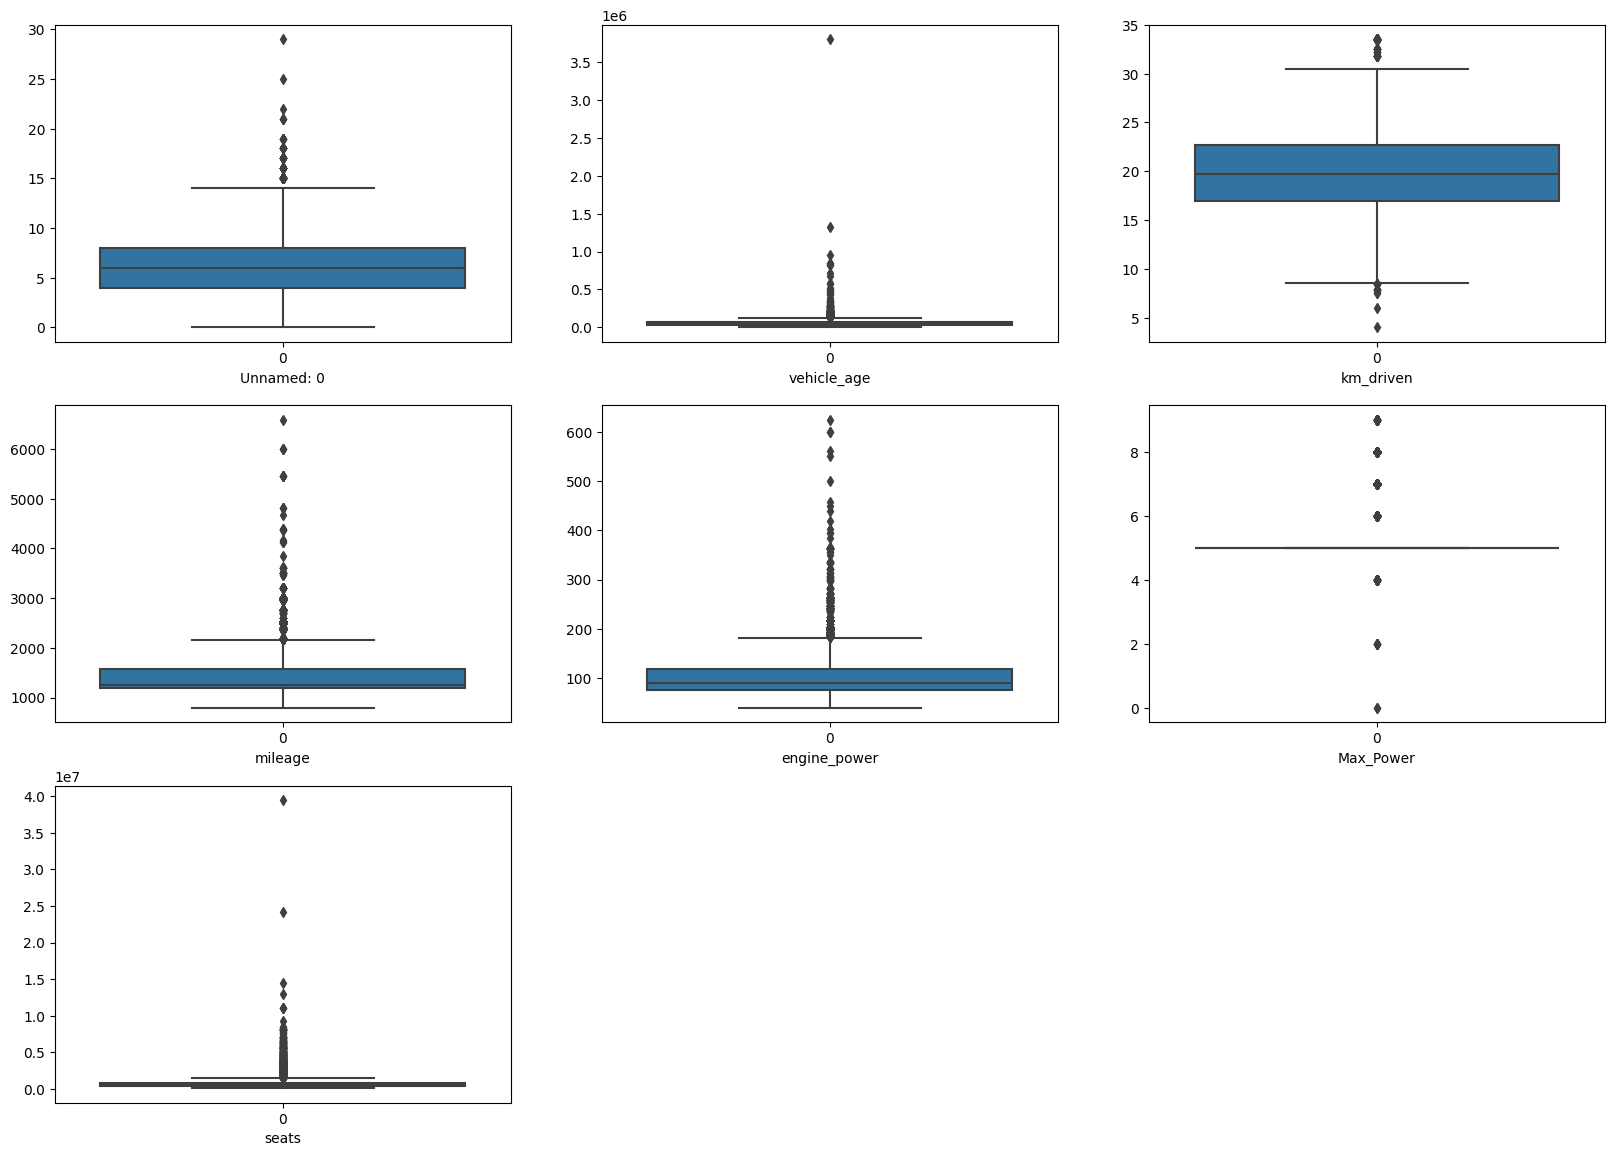

In [42]:
plt.figure(figsize=(20,14))
for i in range(len(numerical[1:])):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[numerical[1:][i]])
    plt.xlabel(numerical[i])
    i=i+1

In [43]:
data.drop(columns=["Unnamed: 0","car_name"],inplace=True)
data.shape

(15411, 12)

In [44]:
data.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


#### Coverting less frquent data to others is not required here because we are using Binary Encoder

In [45]:
# topbrand = data['brand'].value_counts().head(20).index
# data.loc[~data['brand'].isin(topbrand), 'brand'] = 'others'
# data.brand.unique()

In [46]:
# top75model=data.model.value_counts().head(75).index
# data.loc[~data["model"].isin(top75model),"model"]="others"
# data.model.unique()

In [47]:
x=data.iloc[:,:-1]
x.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [48]:
y=data.iloc[:,-1:]
y.shape

(15411, 1)

In [49]:
def detect_outliers(data,cols):
    q1=data[cols].quantile(0.25)
    q2=data[cols].quantile(0.5)
    q3=data[cols].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    data.loc[(data[cols]<lower_limit),cols]=lower_limit
    data.loc[(data[cols]>upper_limit),cols]=upper_limit
    return data 

 

In [50]:
nume_df=[features for features in x.columns if x[features].dtype!="O"]
nume_df
for i in nume_df:
    detect_outliers(data,i)
data.shape

(15411, 12)

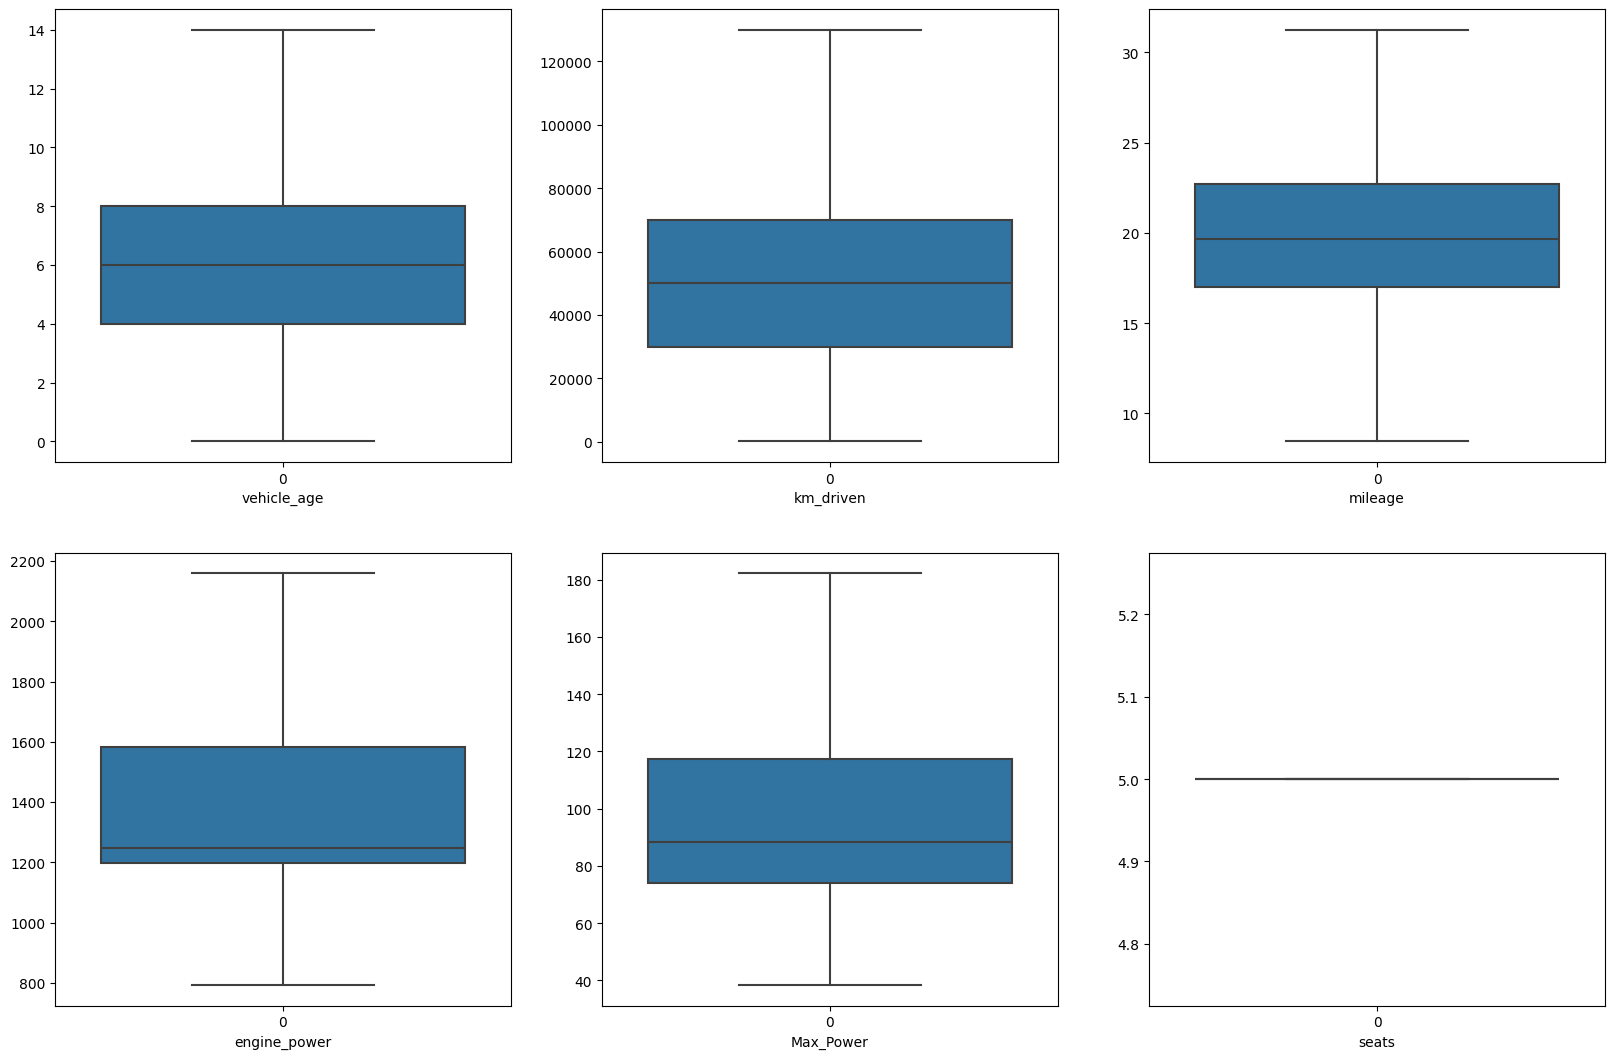

In [51]:
plt.figure(figsize=(20,20))
for i in range(len(nume_df)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[nume_df[i]])
    plt.xlabel(nume_df[i])
    i=i+1

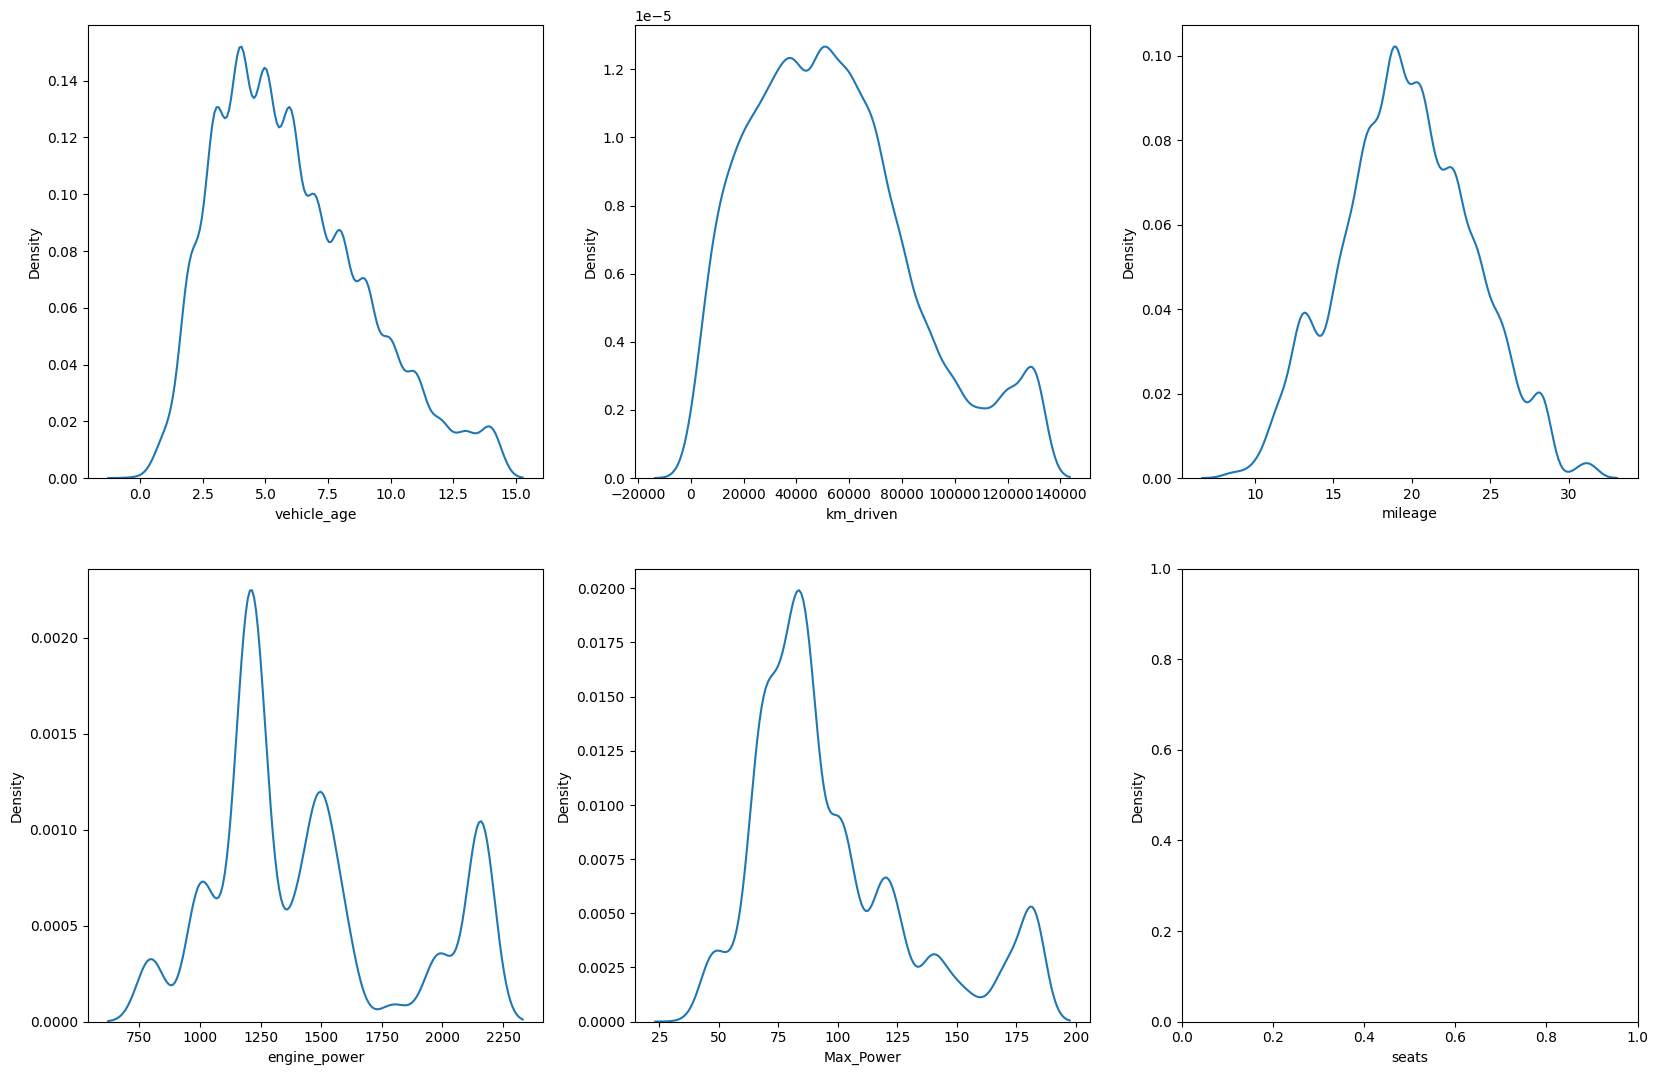

In [52]:
plt.figure(figsize=(20,20))
for i in range(len(nume_df)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data[nume_df[i]])
    plt.xlabel(nume_df[i])
    i=i+1

In [53]:
for i in nume_df:
    print(i,data[i].skew())

vehicle_age 0.6672091903976903
km_driven 0.6174370629664314
mileage 0.06793952577329324
engine_power 0.6840958348868416
Max_Power 1.0672291976442398
seats 0.0


In [54]:
# topbrand=x.brand.value_counts().head(20).index
# for i in range(x.shape[0]):
#     if x["brand"].iloc[i] in topbrand:
#         continue
#     else:
#         x["brand"].iloc[i]="others"

In [55]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from category_encoders.binary import BinaryEncoder


In [56]:
data.seller_type.unique(),data.fuel_type.unique(),data.transmission_type.unique()

(array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object),
 array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object),
 array(['Manual', 'Automatic'], dtype=object))

In [57]:
data.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000


In [58]:
ct=ColumnTransformer(
    [
        ("One hot encoder",OneHotEncoder(sparse_output=False),[4,5,6]),
        ("Binary Encoder",BinaryEncoder(),[0,1]),
        ("StandardScaler",StandardScaler(),[2,3,7,8,9,10]),
    ],
    remainder="drop",
)

x=ct.fit_transform(x)
x[0]

array([ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  9.83561835e-01,
        1.24733473e+00, -2.75974621e-04, -1.32425883e+00, -1.26335238e+00,
       -4.03022414e-01])

In [59]:
x.shape

(15411, 29)

In [60]:
total=np.arange(0,x.shape[1])
remove=[0,3,8]
cols=[i for i in total if i not in remove]
x=x[:,cols]
x[0]

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        9.83561835e-01,  1.24733473e+00, -2.75974621e-04, -1.32425883e+00,
       -1.26335238e+00, -4.03022414e-01])

In [61]:
x.shape

(15411, 26)

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((12328, 26), (12328, 1), (3083, 26), (3083, 1))

In [63]:
#binary encoder is not sy=uitable for linear models like linear regression may interpret binary values as ordinal values, SVR as it iterprets bits to be closer even when they are not
# https://medium.com/latinxinai/xgboost-the-king-of-machine-learning-algorithms-6b5c0d4acd87
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [64]:
xgb=XGBRegressor(objective="reg:squarederror", random_state=42)
dtr=DecisionTreeRegressor(max_depth=15, criterion="squared_error")
rfr=RandomForestRegressor(max_depth=13,n_estimators=12,criterion="squared_error")

In [65]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [66]:
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(f"Training Accuracy : {xgb.score(x_train,y_train)}")
print(f"Testing Accuracy : {r2_score(y_test,y_pred)}")
print(f"MSE Loss : {mean_squared_error(y_test,y_pred)}")
print(f"MAE Loss : {mean_absolute_error(y_test,y_pred)}")
print(f"Intercepts : {xgb.intercept_}")

Training Accuracy : 0.9906200766563416
Testing Accuracy : 0.9465232491493225
MSE Loss : 40256319488.0
MAE Loss : 93883.4609375
Intercepts : [772120.6]


In [67]:
dtr.fit(x_train,y_train)
y_pred=dtr.predict(x_test)
print(f"Training Accuracy : {dtr.score(x_train,y_train)}")
print(f"Testing Accuracy : {r2_score(y_test,y_pred)}")
print(f"MSE Loss : {mean_squared_error(y_test,y_pred)}")
print(f"MAE Loss : {mean_absolute_error(y_test,y_pred)}")

Training Accuracy : 0.9957262361967029
Testing Accuracy : 0.8759926020535443
MSE Loss : 93350511059.29669
MAE Loss : 118428.68133301155


In [68]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(f"Training Accuracy : {rfr.score(x_train,y_train)}")
print(f"Testing Accuracy : {r2_score(y_test,y_pred)}")
print(f"MSE Loss : {mean_squared_error(y_test,y_pred)}")
print(f"MAE Loss : {mean_absolute_error(y_test,y_pred)}")

Training Accuracy : 0.9684130336210719
Testing Accuracy : 0.9156053924380854
MSE Loss : 63530723787.585815
MAE Loss : 103619.66598889342


In [69]:
from sklearn.model_selection import GridSearchCV
model={
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "XGBRegressor":XGBRegressor(), 
}

param_grid={
    "RandomForestRegressor":{
        "n_estimators":[12,14,13],
        "max_depth":[12,14,13],
        "criterion":["squared_error"],
    },
    "DecisionTreeRegressor":{
        "max_depth":[12,14,13],
        "criterion":["squared_error"],   
    },
    "XGBRegressor":{}
}


In [70]:
# grid_search_cv=pd.DataFrame(columns=["models","best_params","best_score"])
# i=0
# for names in model:
#     gsc=GridSearchCV(estimator=model[names],param_grid=param_grid[names],cv=5,return_train_score=True,verbose=2)
#     gsc.fit(x_train,y_train)
#     grid_search_cv.loc[i]=[names,gsc.best_params_,gsc.best_score_]
#     i=i+1
    

In [71]:
# grid_search_cv

In [72]:
# grid_search_cv["best_params"][0]

In [73]:
rfr1=RandomForestRegressor(criterion="squared_error",n_estimators=13,max_depth=10,random_state=42)
rfr1.fit(x_train,y_train)
rfr1.score(x_train,y_train)

0.9671994889734454

In [74]:
rfr1.score(x_test,y_test)

0.9313975953523271

In [75]:
data.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000


In [76]:
df=data.iloc[:2,:]
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796.0,46.3,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197.0,82.0,5,550000


In [77]:
xtest=df.iloc[:,:-1]
xtest

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.7,796.0,46.3,5
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.9,1197.0,82.0,5


In [78]:
xtest.shape

(2, 11)

In [79]:
xtest=ct.transform(xtest)
xtest.shape

(2, 29)

In [80]:
total=np.arange(0,xtest.shape[1])
remove=[0,3,8]
cols=[i for i in total if i not in remove]
xtest=xtest[:,cols]
xtest.shape

(2, 26)

In [81]:
xtest[0]

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        9.83561835e-01,  1.24733473e+00, -2.75974621e-04, -1.32425883e+00,
       -1.26335238e+00, -4.03022414e-01])

In [82]:
pred=rfr1.predict(xtest)
pred

array([183720.96317022, 461716.67857068])

In [83]:
pred1=xgb.predict(xtest)
pred1

array([175078.28, 468336.25], dtype=float32)

In [84]:
# xtest=ct.transform(xtest)
# total=np.arange(0,xtest.shape[1])
# remove=[0,3,8]
# cols=[i for i in total if i not in remove]
# xtest=xtest[:,cols]
# pred1=xgb.predict(xtest)
# pred1

In [85]:
def columndropper(drop):
    total=np.arange(0,x.shape[1])
    cols=[i for i in total if i not in drop]
    x=x[:,cols]
    return x

In [86]:
test2=data.iloc[2:4,:]
test2

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine_power,Max_Power,seats,selling_price
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.0,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.1,5,226000


In [87]:
test2=ct.transform(test2)
test2.shape

(2, 29)

In [88]:
total=np.arange(0,test2.shape[1])
remove=[0,3,8]
cols=[i for i in total if i not in remove]
test2=test2[:,cols]
test2.shape

(2, 26)

In [89]:
#final model
xgb.predict(test2)

array([278971.84, 226133.83], dtype=float32)